In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('auto.csv', header = 0)

In [4]:
df.head()

,Unnamed: 0.1,Unnamed: 0,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,0,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,1,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,3,2,164,audi,std,four,sedan,fwd,front,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,4,4,2,164,audi,std,four,sedan,4wd,front,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [5]:
#lets only use numeric data
df = df._get_numeric_data()

In [6]:
df.head()

,Unnamed: 0.1,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [7]:
#Let's remove the columns 'Unnamed:0.1' and 'Unnamed:0' since they do not provide any value to the models.
df = df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis = 1)

In [8]:
df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,1,122,94.5,0.822681,0.909722,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,2,164,99.8,0.848630,0.919444,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,2,164,99.4,0.848630,0.922222,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [9]:
#libraries for plotting
from ipywidgets import interact, interactive, fixed, interact_manual

In [10]:
#functions for plotting
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    ax1 = sns.kdeplot(RedFunction, color="r", label=RedName)
    ax2 = sns.kdeplot(BlueFunction, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')
    plt.show()
    plt.close()

In [87]:
#functions for plotting
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()
    plt.show()
    plt.close()

Training and Testing

In [14]:
#split the data
y_data = df['price']

In [15]:
x_data = df.drop('price',axis = 1)

In [49]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=42)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 21
number of training samples: 180


In [50]:
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [51]:
lre = LinearRegression()

In [52]:
lre.fit(x_train[['horsepower']],y_train)

LinearRegression()

In [53]:
#make some predictions
predictions = lre.predict(x_test[['horsepower']])
predictions

array([ 7472.88952246, 25449.82437601,  8586.50495587,  7631.97744152,
       13995.49420384,  7313.8016034 , 21154.45056145, 11131.9116608 ,
       22108.9780758 , 24495.29686167, 16063.63715159,  7313.8016034 ,
       14950.02171819, 10495.55998456, 13995.49420384,  4768.39489848,
        9859.20830833,  7631.97744152, 10495.55998456, 21154.45056145,
       29427.02235246])

Text(0.5, 1.0, 'Eval of our Linear Regression Model')

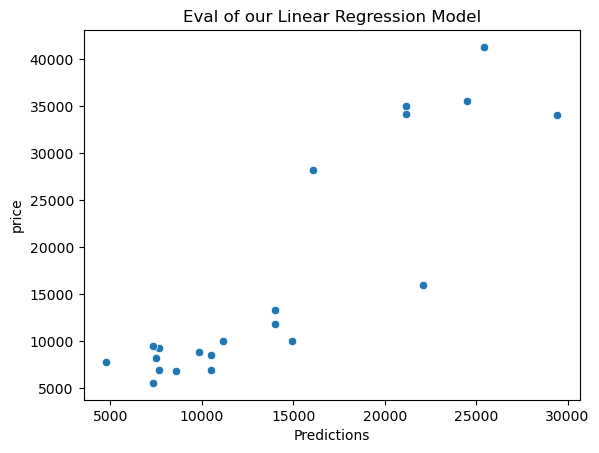

In [54]:
sns.scatterplot(x = predictions, y = y_test)
plt.xlabel('Predictions')
plt.title("Eval of our Linear Regression Model")

In [55]:
#lets compare how the r squared looks on the training vs the test data
lre.score(x_train[['horsepower']], y_train)

0.6385840105530061

In [56]:
lre.score(x_test[['horsepower']], y_test)

0.6572835188314445

Cross Validation Score

In [58]:
from sklearn.model_selection import cross_val_score

In [59]:
#We input the object, the feature ("horsepower"), and the target data (y_data). The parameter 'cv' determines the number of folds. In this case, it is 4.
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)

In [60]:
#The default scoring is R^2. Each element in the array has the average R^2 value for the fold:
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [61]:
#calculate the average and std dev of our estimate
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.522009915042119 and the standard deviation is 0.2911839444756029


In [62]:
#differnt scoring method
-1 * cross_val_score(lre,x_data[['horsepower']], y_data,cv=4,scoring='neg_mean_squared_error')

array([20254142.84026704, 43745493.26505169, 12539630.34014931,
       17561927.72247591])

In [63]:
#You can also use the function 'cross_val_predict' to predict the output. We only want to do this when evaluating the model and not use it a final prediction. we can use .predict for that
from sklearn.model_selection import cross_val_predict

In [64]:
yhat = cross_val_predict(lre, x_data[['horsepower']], y_data, cv=4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

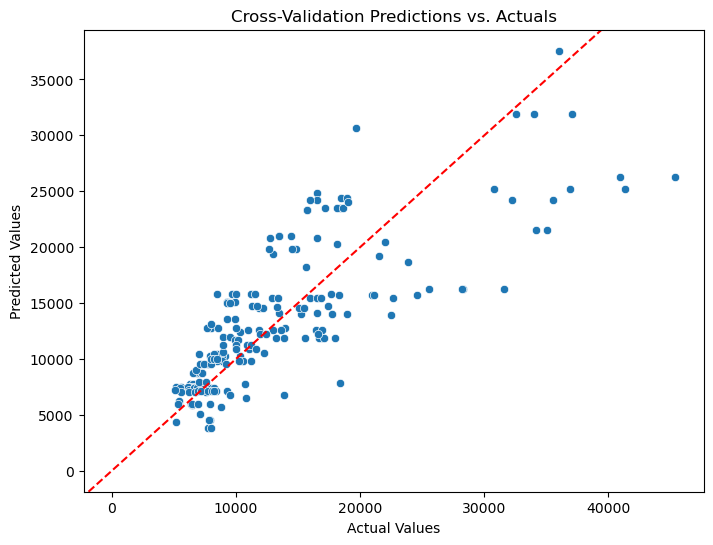

In [65]:
# Scatter plot of actual vs. predicted values
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_data, y=yhat)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Cross-Validation Predictions vs. Actuals")
plt.axline([0,0], [1,1], color="red", linestyle="--")  # Perfect prediction line
plt.show()

Overfitting, Underfitting and Model Selection

In [66]:
#Let's create Multiple Linear Regression objects and train the model using
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression()

In [67]:
#lets make a prediction using the training data
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([27184.98126069,  6079.97788456,  6571.55260171, 23634.90728233,
       10399.3567925 ])

In [68]:
#lets make a prediction using the testing data
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([ 6742.43726315, 26620.30861722,  5835.9977778 ,  7454.44829397,
       13402.42315763])

In [69]:
#Let's perform some model evaluation using our training and testing data separately. First, we import the seaborn and matplotlib library for plotting.
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

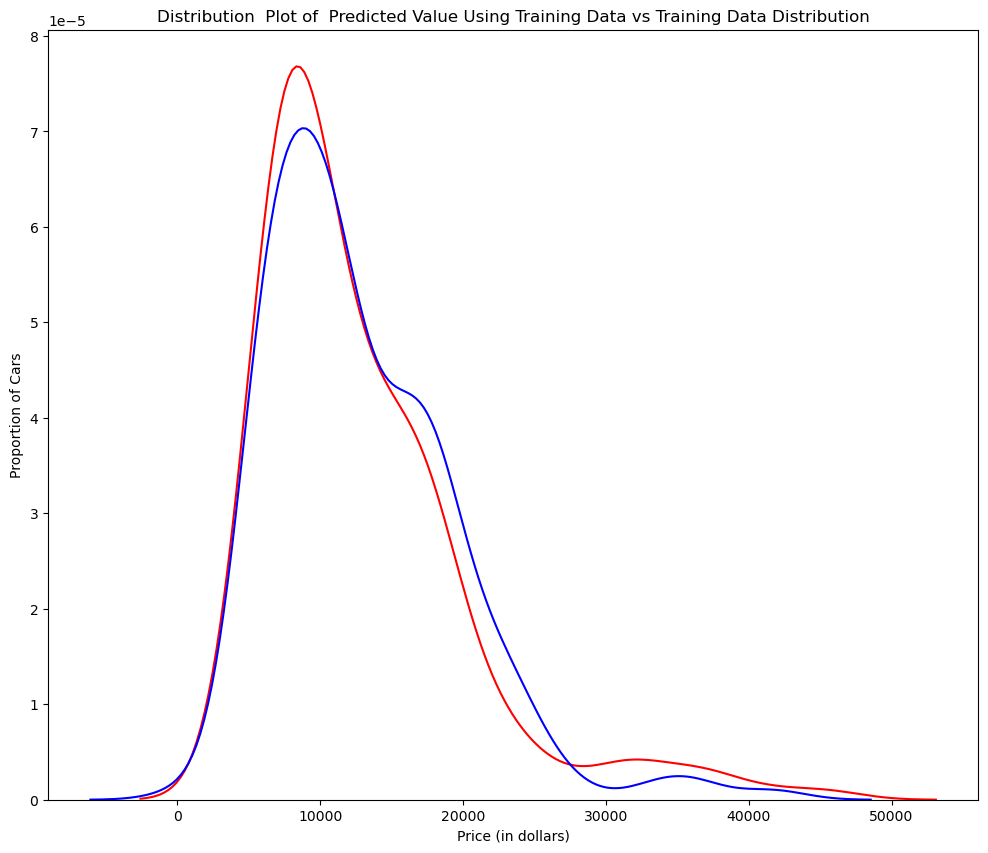

In [70]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

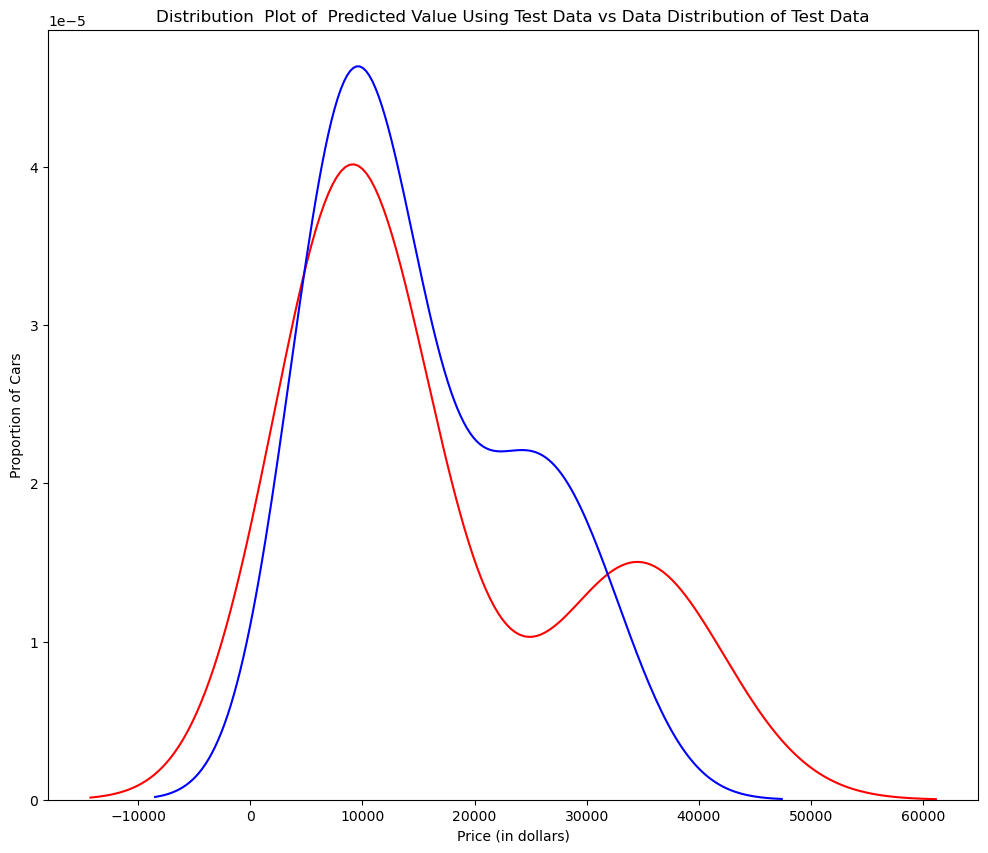

In [71]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

Comparing Figure 1 and Figure 2, it is evident that the distribution of the test data in Figure 1 is much better at fitting the data. Let's see if polynomial regression also exhibits a drop in the prediction accuracy when analysing the test dataset.

In [72]:
from sklearn.preprocessing import PolynomialFeatures

Overfitting occurs when the model fits the noise, but not the underlying process. Therefore, when testing your model using the test set, your model does not perform as well since it is modelling noise, not the underlying process that generated the relationship. Let's create a degree 5 polynomial model.

In [73]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

In [96]:
pr = PolynomialFeatures(degree=3)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=3)

In [97]:
#Now, let's create a Linear Regression model "poly" and train it.
poly = LinearRegression()
poly.fit(x_train_pr,y_train)

LinearRegression()

In [98]:
poly_predictions = poly.predict(x_test_pr)
poly_predictions[0:5]

array([ 7689.89346176,  8117.43110865, 11310.88511099, 20124.08726956,
       20775.2293894 ])

In [99]:
print("Predicted values:", poly_predictions[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [ 7689.89346176  8117.43110865 11310.88511099 20124.08726956]
True values: [ 6295. 10698. 13860. 13499.]


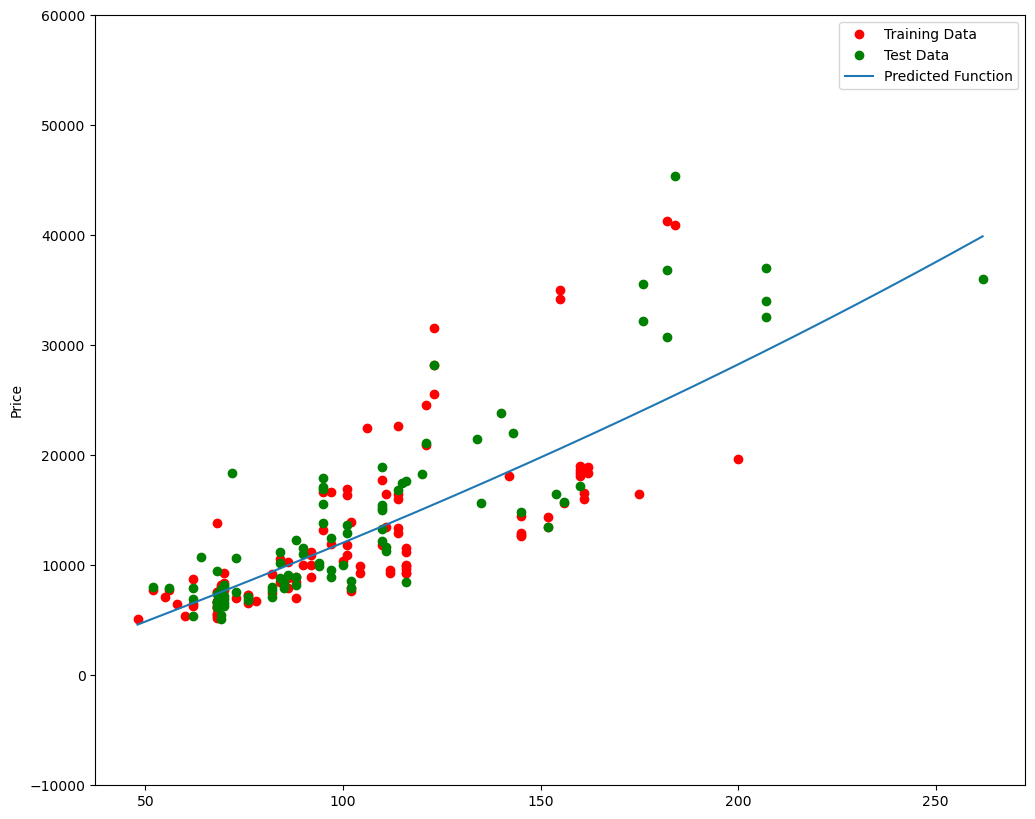

In [100]:
PollyPlot(x_train['horsepower'], x_test['horsepower'], y_train, y_test, poly,pr)

In [101]:
#lets check the r squared values for training set
poly.score(x_train_pr, y_train)

0.5330031006348543

In [102]:
#lets check the r squared values for testing set
poly.score(x_test_pr, y_test)

0.7406204232772002

We see the R^2 for the training data is 0.5567 while the R^2 on the test data was -29.87. The lower the R^2, the worse the model. A negative R^2 is a sign of overfitting.

Let's see how the R^2 changes on the test data for different order polynomials and then plot the results:

[0.7325101750243117, 0.7405858710699887, 0.7406204232772002, 0.40639663699026296]


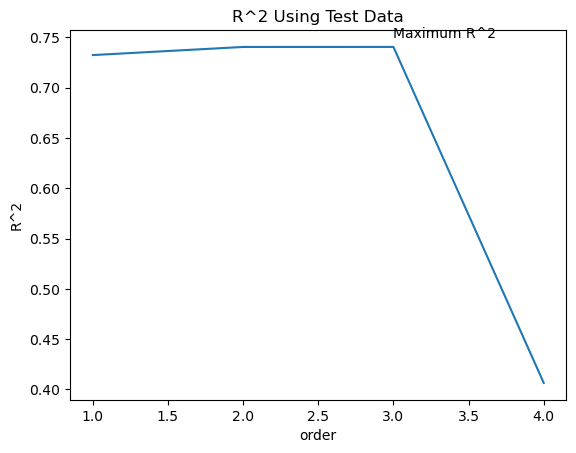

In [103]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')    
print(Rsqu_test)
plt.show()

Ridge Regression. In this section, we will review Ridge Regression and see how the parameter alpha changes the model.

In [104]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

In [105]:
from sklearn.linear_model import Ridge

In [106]:
RidgeModel = Ridge(alpha = 1)

In [107]:
#Like regular regression, you can fit the model using the method fit.
RidgeModel.fit(x_train_pr, y_train)

Ridge(alpha=1)

In [108]:
ridge_predictions = RidgeModel.predict(x_test_pr)

In [109]:
print('predicted:', ridge_predictions[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 6570.82441941  9636.24891471 20949.92322737 19403.60313255]
test set : [ 6295. 10698. 13860. 13499.]


We select the value of alpha that minimizes the test error. To do so, we can use a for loop. We have also created a progress bar to see how many iterations we have completed so far.

In [110]:
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RidgeModel = Ridge(alpha=alpha) 
    RidgeModel.fit(x_train_pr, y_train)
    test_score, train_score = RidgeModel.score(x_test_pr, y_test), RidgeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|█████████████████████████████████████████| 1000/1000 [00:11<00:00, 90.34it/s, Test Score=0.564, Train Score=0.859]


We can plot out the value of R^2 for different alphas:

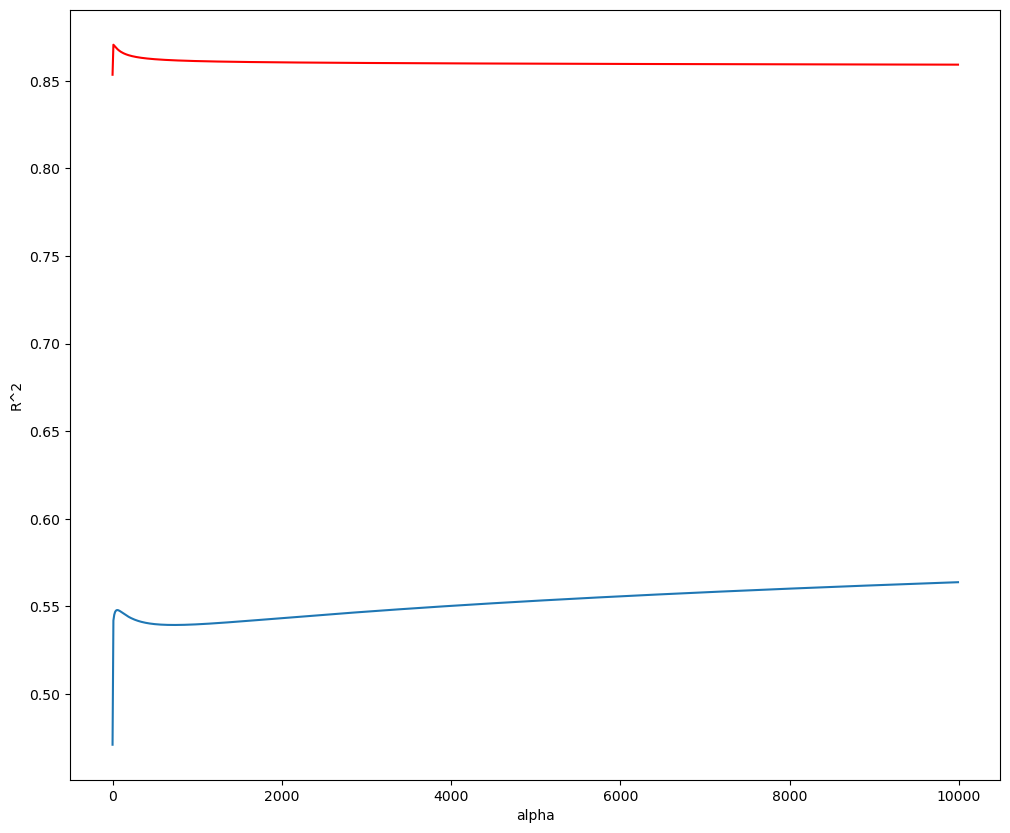

In [113]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend
plt.show()

Grid Search. The term alpha is a hyperparameter. Sklearn has the class GridSearchCV to make the process of finding the best hyperparameter simpler.

In [114]:
from sklearn.model_selection import GridSearchCV

In [115]:
#We create a dictionary of parameter values:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [116]:
#create a ridge regression object 
RR=Ridge()
RR

Ridge()

In [118]:
#create a grid search object and fit the model
Grid1 = GridSearchCV(RR, parameters1,cv=4)
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

The object finds the best parameter values on the validation data. We can obtain the estimator with the best parameters and assign it to the variable BestRR as follows:

In [122]:
BestRR=Grid1.best_estimator_
best_model = BestRR

In [123]:
#we now test our model on the test data
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8411649831036152

In [125]:
grid_search_predictions = best_model.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

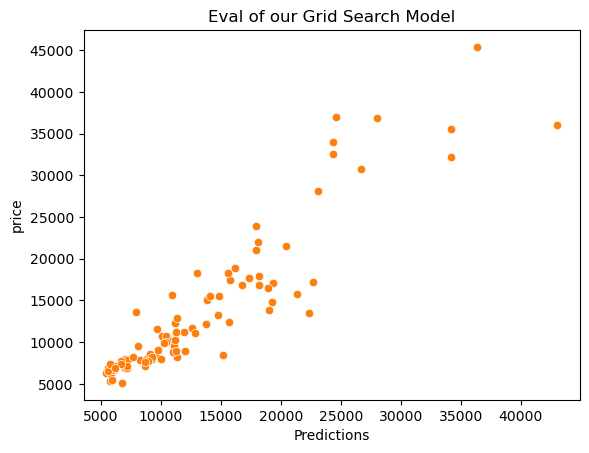

In [127]:
sns.scatterplot(x = grid_search_predictions, y = y_test)
plt.xlabel('Predictions')
plt.title("Eval of our Grid Search Model")
plt.show()